# Tools for Car Object Detection - YOLOv8 Model

<img width="1109" alt="Screen Shot 2023-10-03 at 12 13 27 PM" src="https://github.com/nickthetj/CarObjectDetection/assets/37059423/bf1b8802-b453-44ea-8dde-fe1a0ddcfe1d">
(Source: Zapp2Photo/Shutterstock.com)

## Overview
Object recognition is the linchpin for self-driving cars. It enables self-driving cars to identify and respond to objects like pedestrians and vehicles in real-time, ensuring safer autonomous driving. This notebook will walk through three object detection models that can identify and draw bounding-boxes around cars on the road: YOLOv8, R-CNN, and Bounding Box Regression (BB). The YOLOv8 model was implemented with the pre-packaged model from Ultralytics, and R-CNN and BB were built from the ground up. We will walk through differences between each model on a conceptual level, their implementation and respective evaluation scores. 

## Business Problem
These object detection models were developed as a tool for autonomous vehicles and traffic safety cameras to enable the cameras to perceive and understand its environment by identifying and locating objects of interest in real-time. Specifically in identifying and locating where cars are in a picture.

## The Data
The data was taken from a kaggle dataset consisting of 1176 street view images divided into test and training sets. Some of these images consisted of cars and others did not. The dataset also included bounding box informations associated with each image. There were no labels for this dataset as there was only one class of object, a car. 

To download this dataset visit the following link: https://www.kaggle.com/datasets/sshikamaru/car-object-detection

In [4]:
# install yolov8
! pip install ultralytics

## Imports

In [5]:
from ultralytics import YOLO
import os
import random
import shutil
import numpy as np
import pandas as pd
import cv2
import yaml
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split

## Setting parameters

In [6]:
DIR = "data/cars/"
IMAGES = DIR +"images/"
LABELS = DIR +"labels/"
TRAIN = "data/training_images"
TEST = "data/testing_images"

In [7]:
df = pd.read_csv("data/bounding_boxes.csv")


## Setting dataset

In [8]:
files = list(df.image.unique())
files_train, files_valid = train_test_split(files, test_size = 0.2)

In [7]:
# make directories
os.makedirs(IMAGES+"train", exist_ok=True)
os.makedirs(LABELS+"train", exist_ok=True)
os.makedirs(IMAGES+"valid", exist_ok=True)
os.makedirs(LABELS+"valid", exist_ok=True)

In [8]:
train_filename = set(files_train)
valid_filename = set(files_valid)
for file in glob.glob(TRAIN+"/*"):
    fname =os.path.basename(file)
    if fname in train_filename:
        shutil.copy(file, IMAGES+"train")
    elif fname in valid_filename:
        shutil.copy(file, IMAGES+"valid")

In [9]:
for _, row in df.iterrows():    
    image_file = row['image']
    class_id = "0"
    x = row['xmin']
    y = row['ymin']
    width = row['xmax'] - row['xmin']
    height = row['ymax'] - row['ymin']

    x_center = x + (width / 2)
    y_center = y + (height / 2)
    x_center /= 676
    y_center /= 380
    width /= 676
    height /= 380

    if image_file in train_filename:   
        annotation_file = os.path.join(LABELS) + "train/" + image_file.replace('.jpg', '.txt')
    else:
        annotation_file = os.path.join(LABELS) + "valid/" + image_file.replace('.jpg', '.txt')
        
    with open(annotation_file, 'a') as ann_file:
        ann_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

## Setup yaml file

In [16]:
%%writefile dataset.yaml
# Path
path: /Users/nicholastjandra/documents/flatiron/phase_5/CarObjectDetection/kaggle/working/datasets/cars
train: images/train
test: images/test
val: images/valid

# Classes
nc: 1
names: ['car']

Overwriting dataset.yaml


## Disable wandb

In [10]:
# disable wandb
import wandb
wandb.init(mode="disabled")

ModuleNotFoundError: No module named 'wandb'

## Training the Model

In [17]:
model = YOLO('yolov8n.pt')
model.train(data="dataset.yaml", epochs=20, batch=8)

Ultralytics YOLOv8.0.192 🚀 Python-3.11.4 torch-2.0.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=20, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

KeyboardInterrupt: 

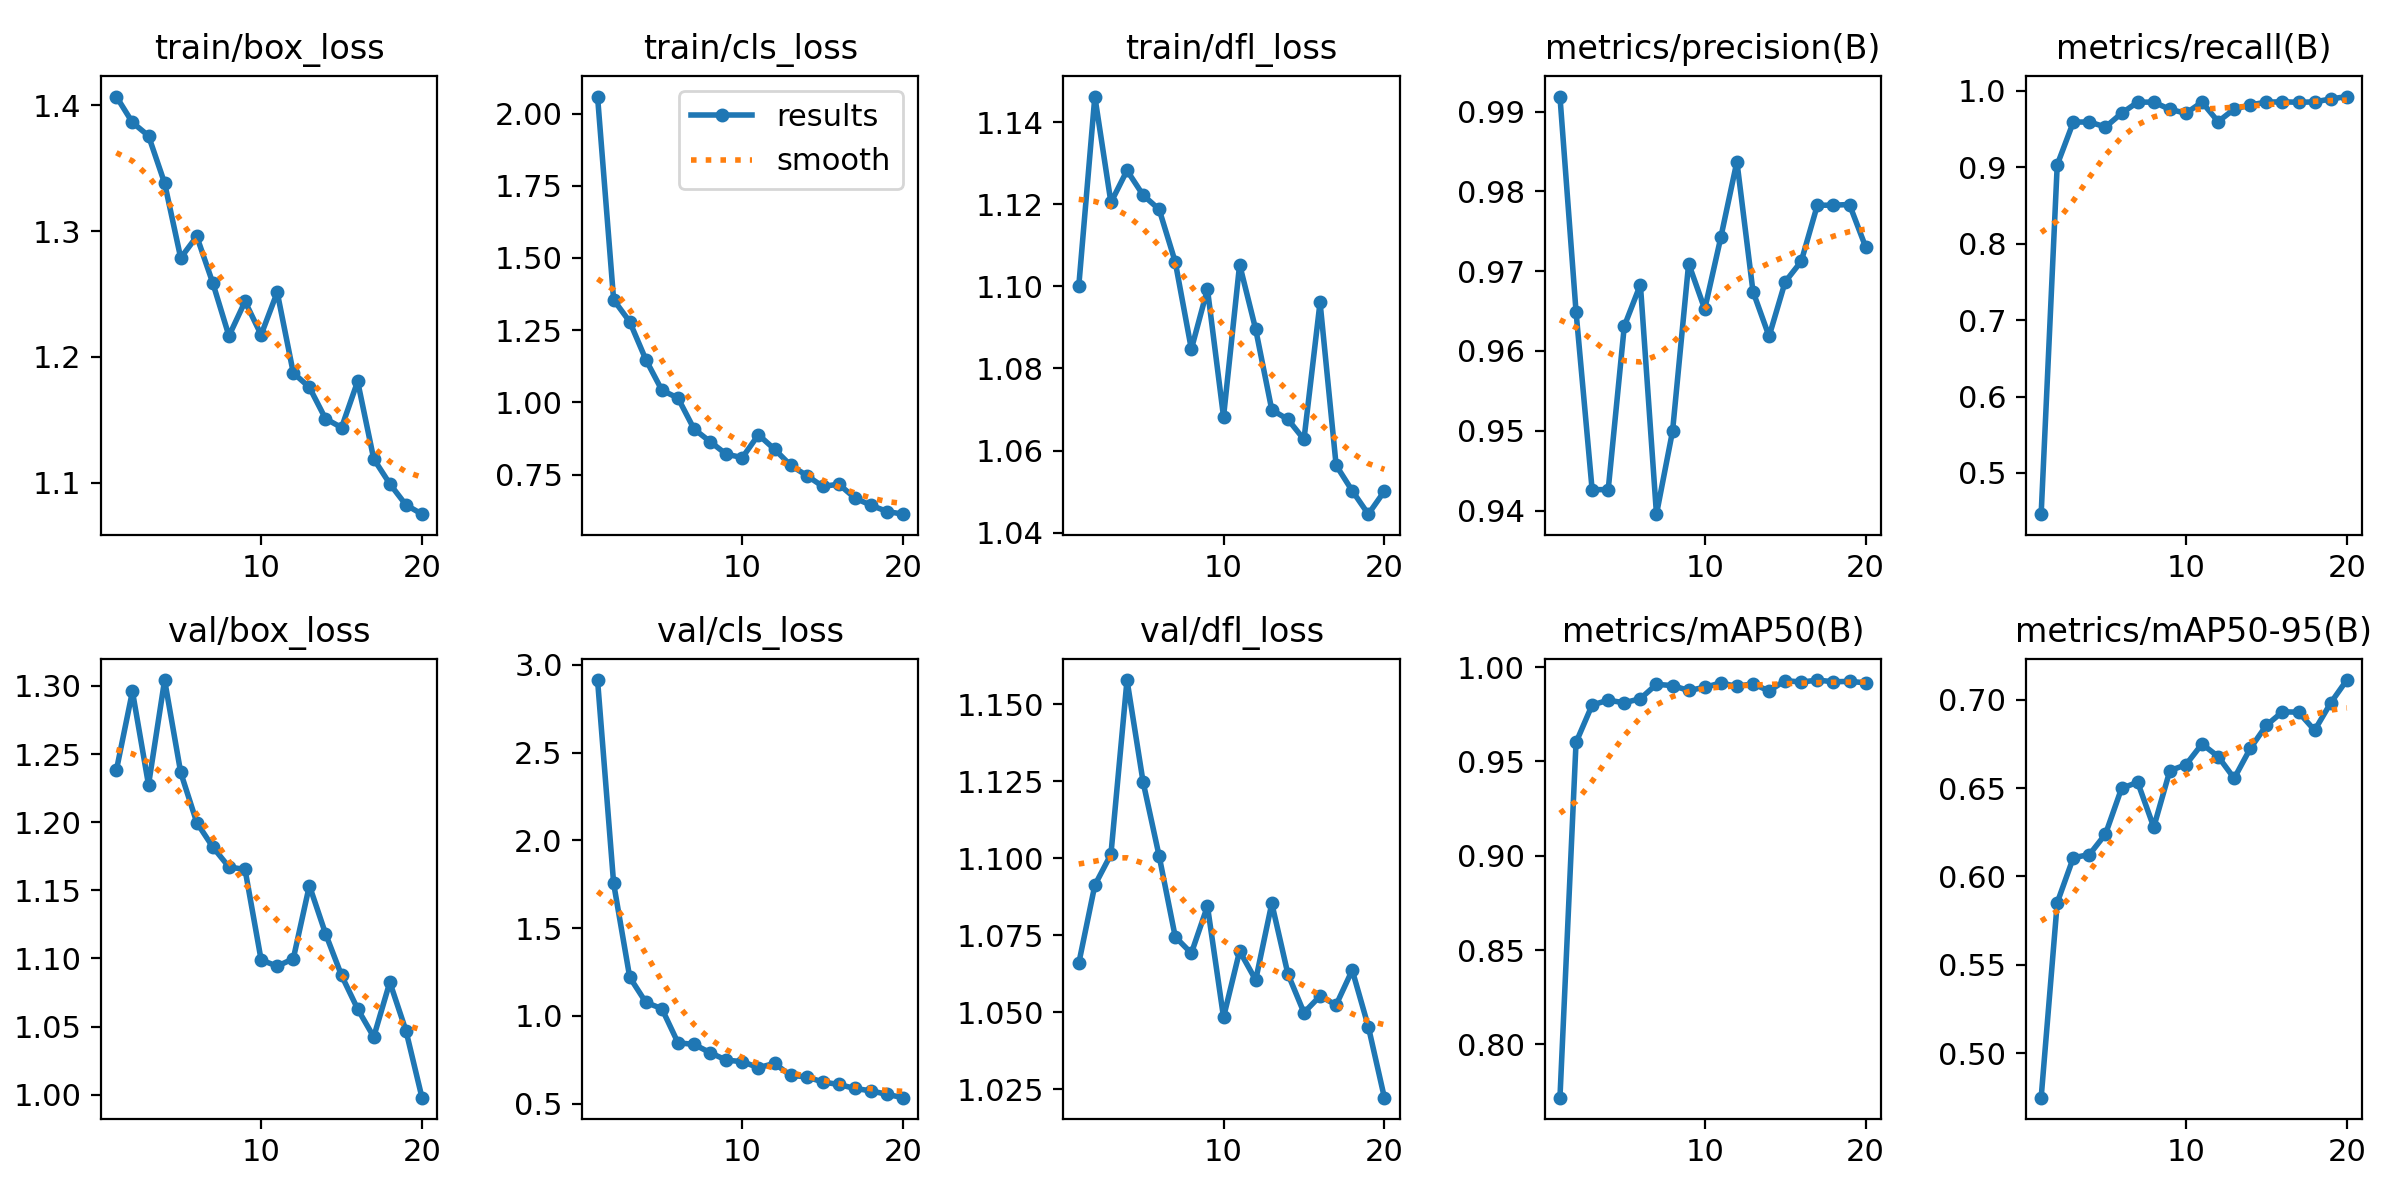

In [11]:
from IPython.display import Image

Image("runs/detect/train7/results.png")

## Plot Confusion Matrix

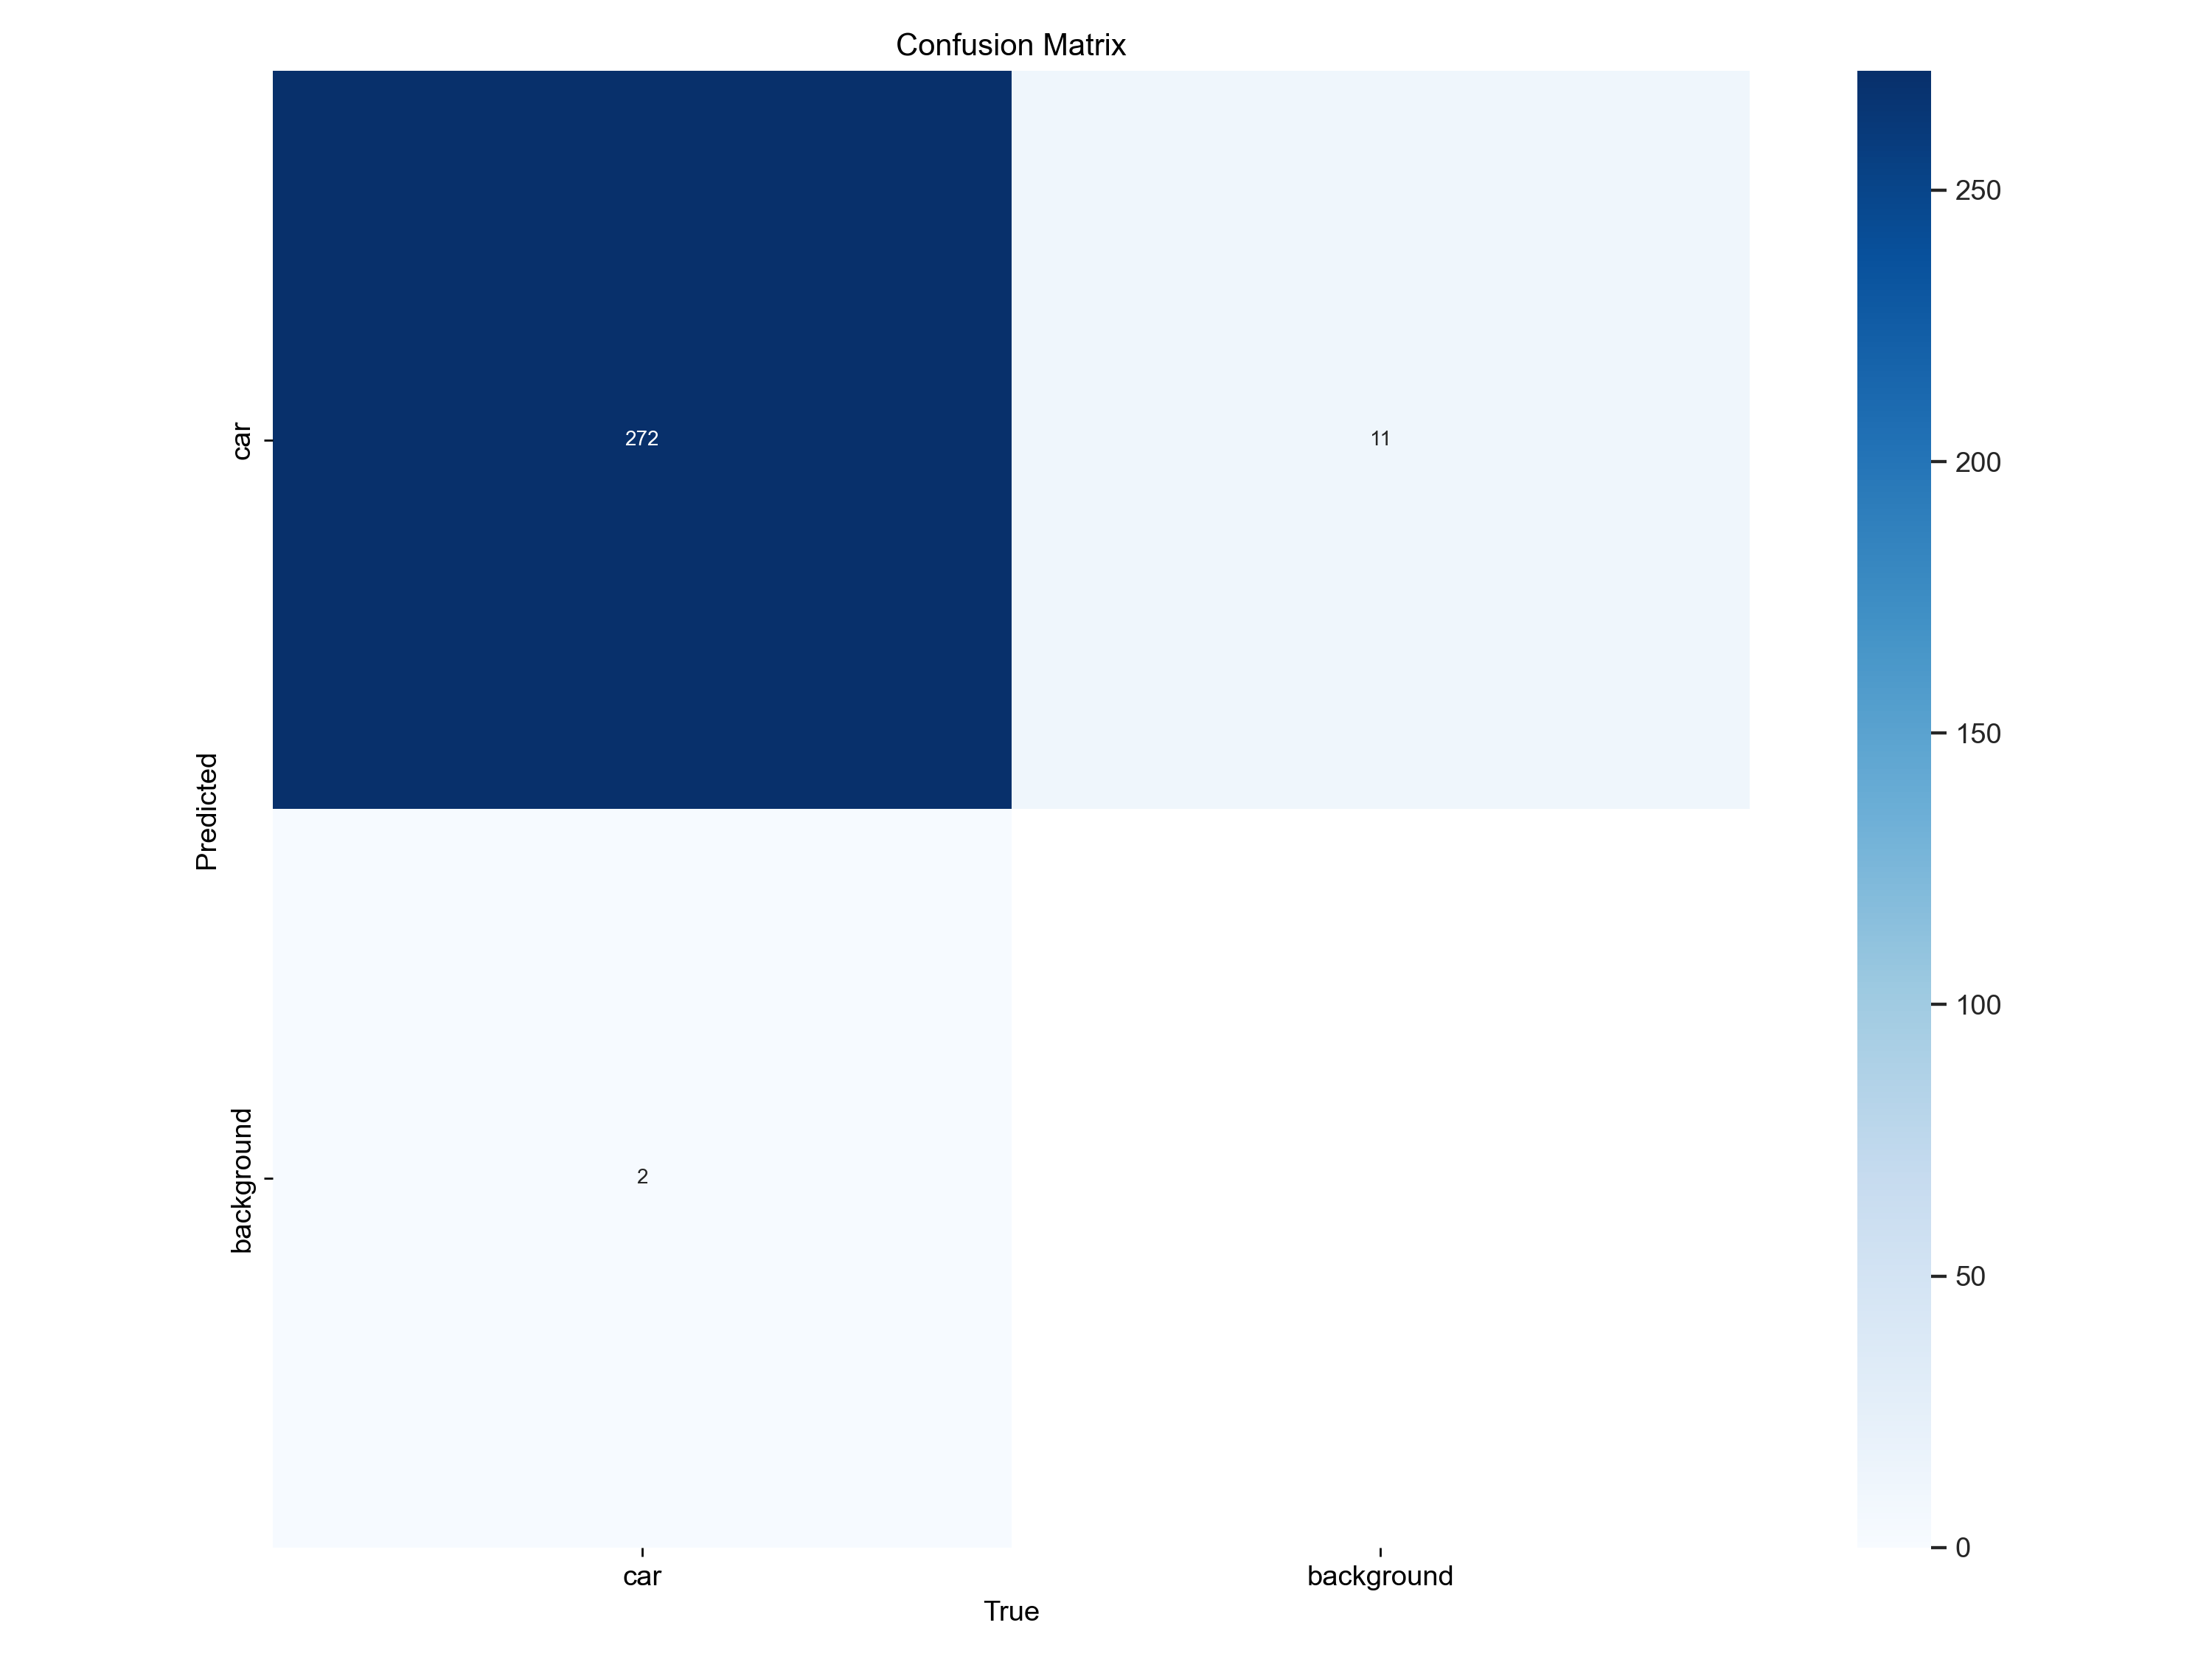

In [12]:
Image("runs/detect/train7/confusion_matrix.png")

## Running on test set

In [34]:
from PIL import Image


In [7]:
model = YOLO('runs/detect/train7/weights/last.pt')
ret = model("kaggle/input/car-object-detection/data/testing_images",save=True, conf=0.2, iou=0.5)


image 1/175 /Users/nicholastjandra/Documents/Flatiron/phase_5/CarObjectDetection/kaggle/input/car-object-detection/data/testing_images/vid_5_25100.jpg: 384x640 (no detections), 99.1ms
image 2/175 /Users/nicholastjandra/Documents/Flatiron/phase_5/CarObjectDetection/kaggle/input/car-object-detection/data/testing_images/vid_5_25120.jpg: 384x640 (no detections), 67.0ms
image 3/175 /Users/nicholastjandra/Documents/Flatiron/phase_5/CarObjectDetection/kaggle/input/car-object-detection/data/testing_images/vid_5_25140.jpg: 384x640 (no detections), 59.7ms
image 4/175 /Users/nicholastjandra/Documents/Flatiron/phase_5/CarObjectDetection/kaggle/input/car-object-detection/data/testing_images/vid_5_25160.jpg: 384x640 (no detections), 59.9ms
image 5/175 /Users/nicholastjandra/Documents/Flatiron/phase_5/CarObjectDetection/kaggle/input/car-object-detection/data/testing_images/vid_5_25180.jpg: 384x640 (no detections), 62.6ms
image 6/175 /Users/nicholastjandra/Documents/Flatiron/phase_5/CarObjectDetectio

In [19]:
model.val()

In [20]:
model.val()

Ultralytics YOLOv8.0.192 🚀 Python-3.11.4 torch-2.0.1 CPU (Apple M1)
val: Scanning /Users/nicholastjandra/documents/flatiron/phase_5/CarObjectDetection/kaggle/working/datasets/coco/labels/val2017.cache... 0 images, 0 backgrounds, 5000 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
val: WARNING ⚠️ /Users/nicholastjandra/documents/flatiron/phase_5/CarObjectDetection/kaggle/working/datasets/coco/images/val2017/000000000139.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: '/Users/nicholastjandra/documents/flatiron/phase_5/CarObjectDetection/kaggle/working/datasets/coco/images/val2017/000000000139.jpg'
val: WARNING ⚠️ /Users/nicholastjandra/documents/flatiron/phase_5/CarObjectDetection/kaggle/working/datasets/coco/images/val2017/000000000285.jpg: ignoring corrupt image/label: [Errno 2] No such file or directory: '/Users/nicholastjandra/documents/flatiron/phase_5/CarObjectDetection/kaggle/working/datasets/coco/images/val2017/000000000285.jpg'
val: WARNING ⚠️ /User

ValueError: not enough values to unpack (expected 3, got 0)

curl⚠️ Download failure, retrying 2/3 http://images.cocodataset.org/zips/train2017.zip...
: (56) Recv failure: Connection reset by peer
curl: (56) Recv failure: Connection reset by peer
⚠️ Download failure, retrying 3/3 http://images.cocodataset.org/zips/train2017.zip...
curl: (56) Recv failure: Connection reset by peer


In [35]:
# Show the results
for r in ret:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    # im.save('results.jpg')  # save imag # plot a BGR numpy array of predictions

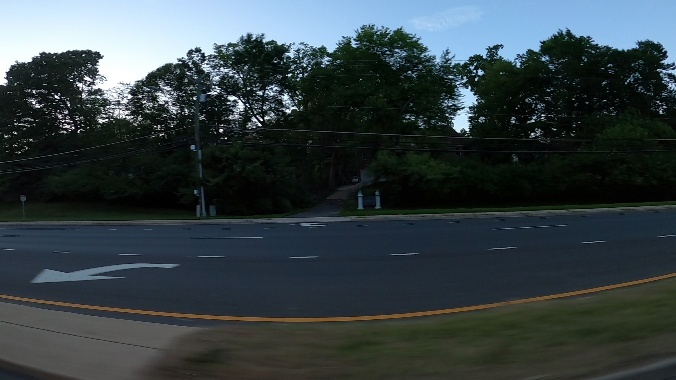

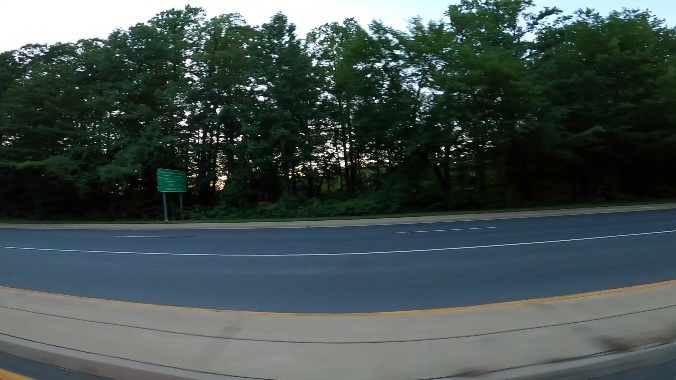

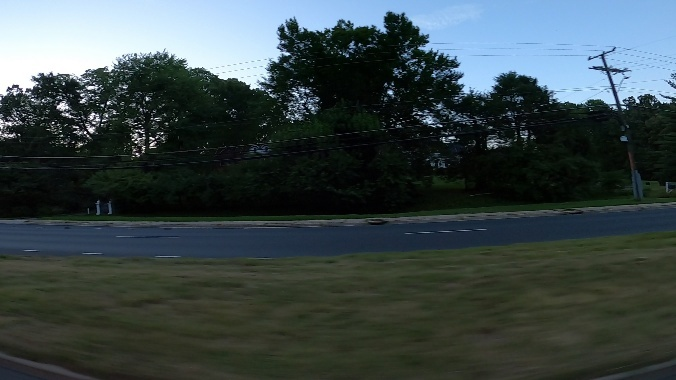

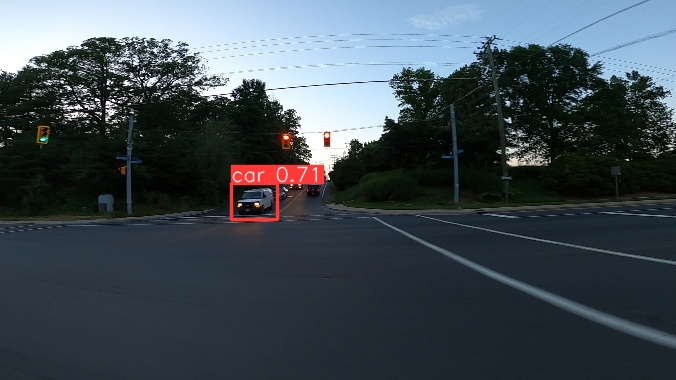

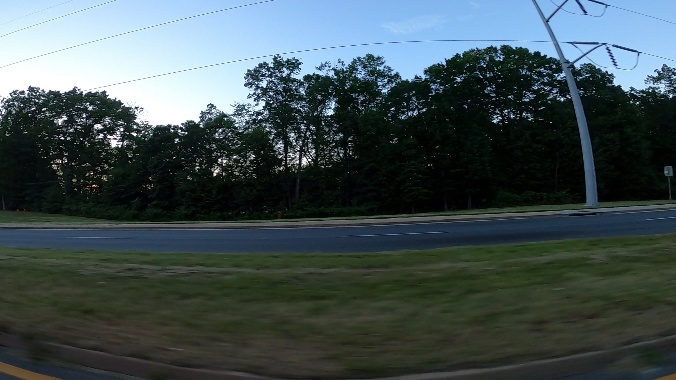

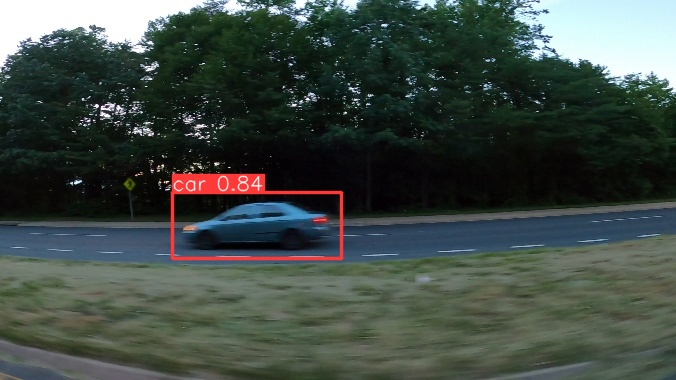

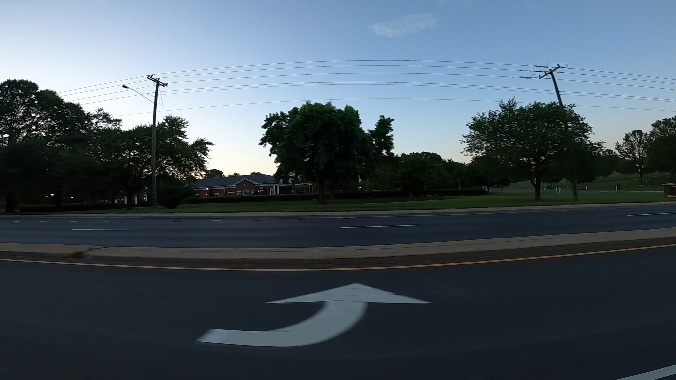

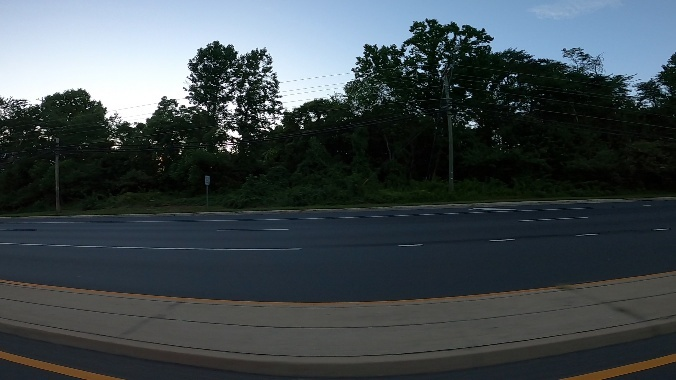

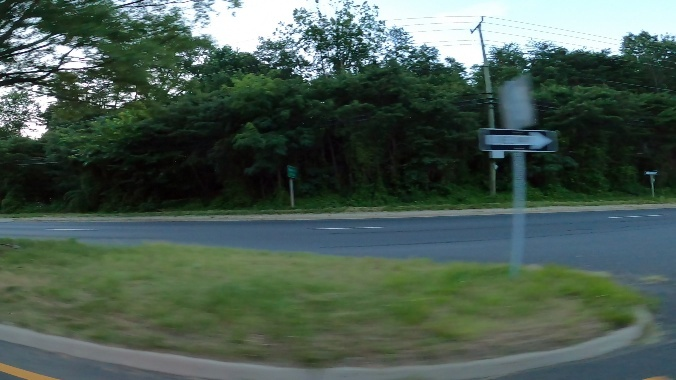

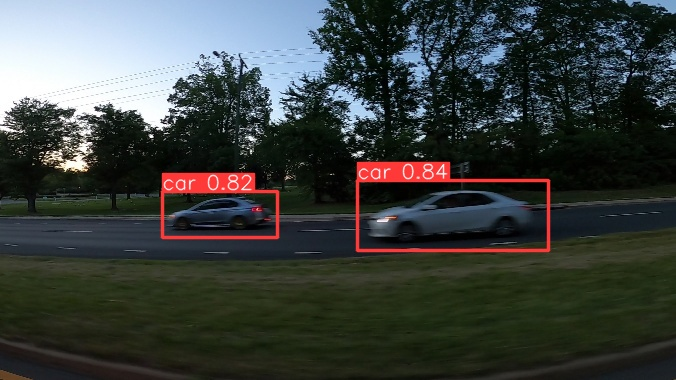

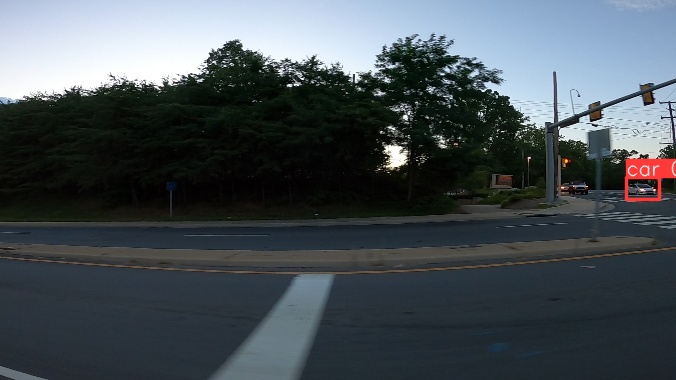

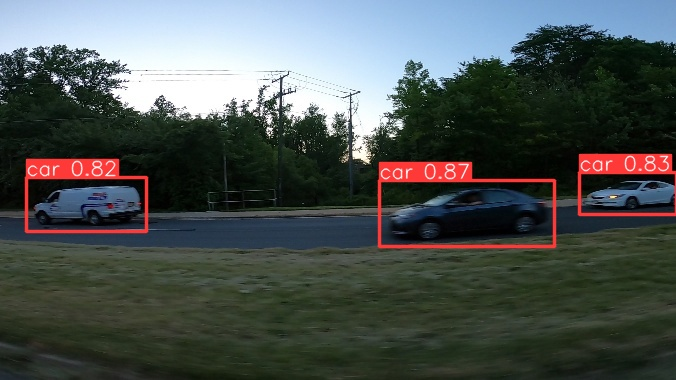

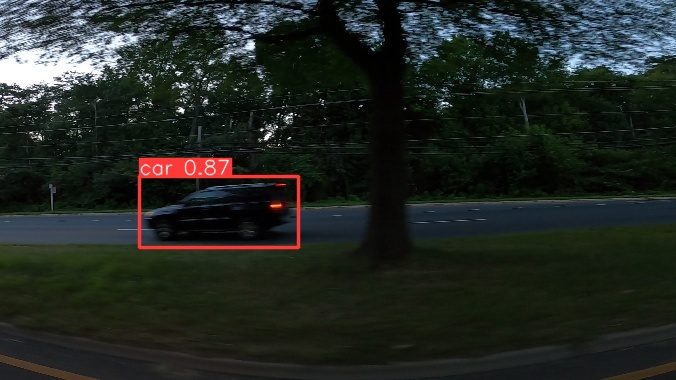

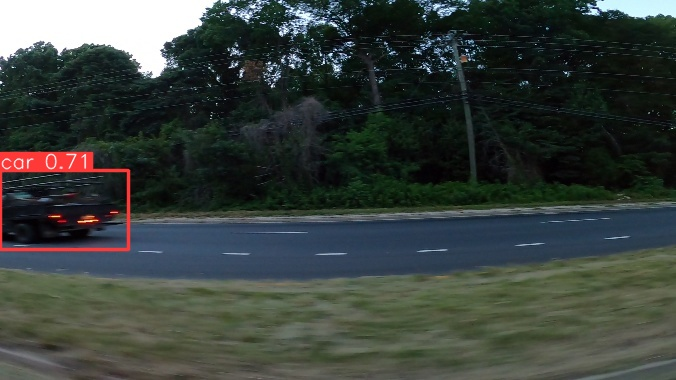

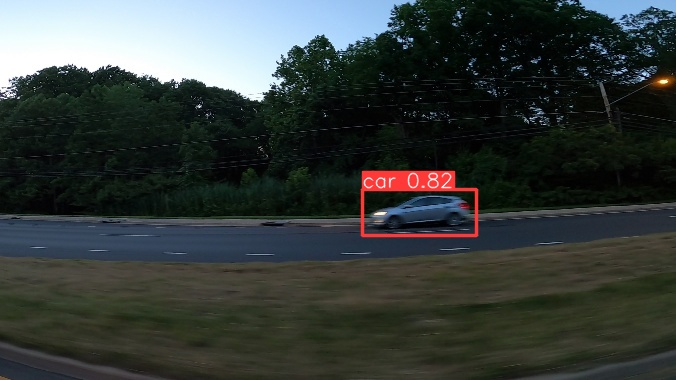

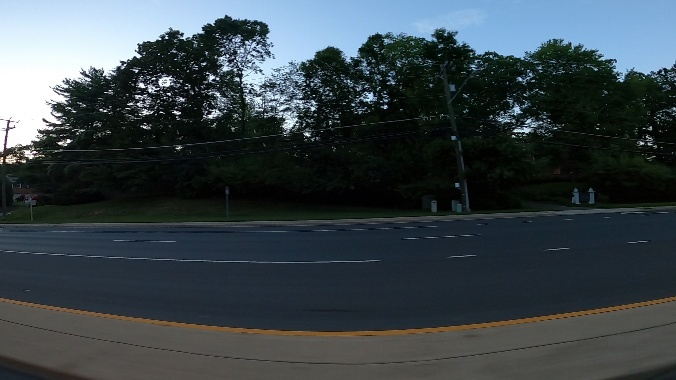

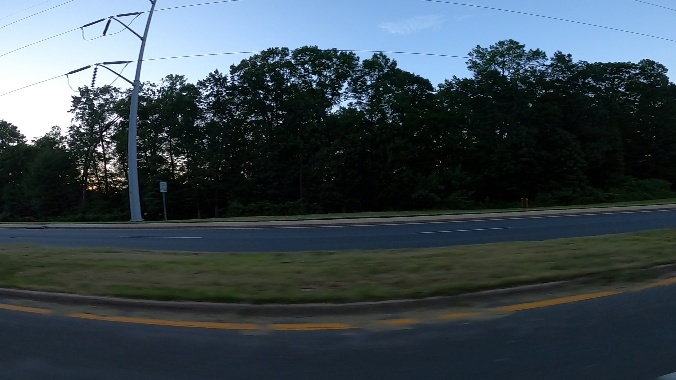

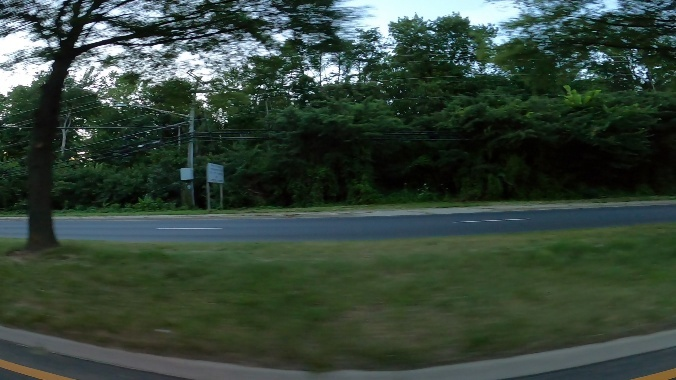

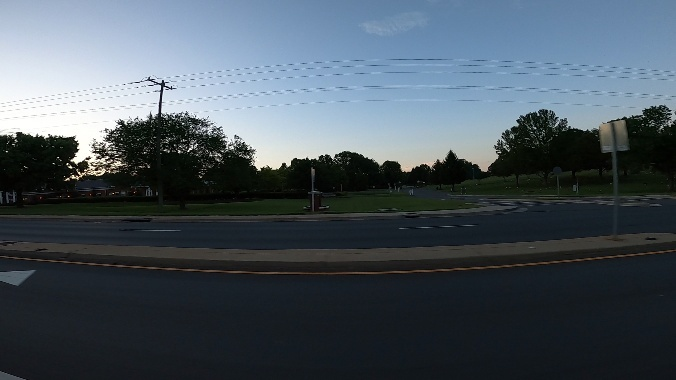

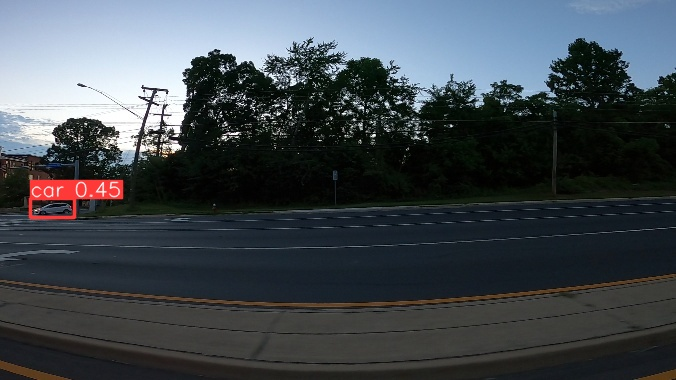

In [22]:
# display result
files = glob.glob("runs/detect/predict/*")
for i in range(0, 60, 3):
    img = Image(files[i])
    display(img)

## Next Steps